- 20144753 Seung Yeop, Seon
- https://github.com/SYseon/Assignment09
- Use least square, we can get a boundary which helps to decide where the sample belongs
- Put the values from the product of feature and parameter into the sign function.

\begin{equation} Using\ random\ variables, make\ feature\ fucntions\ f(x)\ then, \end{equation}
\begin{equation}A=\begin{Bmatrix} 
     f(x_{1})_{1} & f(x_{1})_{2} & \dots & f(x_{1})_{p}\\
    f(x_{2})_{1} & f(x_{2})_{2} & \dots & f(x_{2})_{p}\\
    \vdots & \vdots & \vdots & \vdots \\
    f(x_{m})_{1} & f(x_{m})_{2} & \dots & f(x_{m})_{p}\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}b=\begin{Bmatrix} 
      y_1\\
    y_2\\
    \vdots\\
    y_n\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}\theta=(A^TA)^{-1}A^Tb\end{equation}

\begin{equation} if,\;x<0\; then,\;sign(x)= -1.\quad otherwise,\; sign(x)= 1 \end{equation}

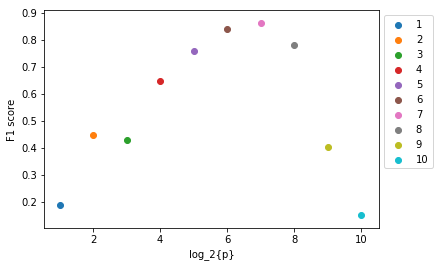

Maximum F1 score : 0.8614116434827408 When p =  128


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
from sklearn.metrics import f1_score
 
class classifier():
    def __init__(self, p = 1):
        self.p = p
 
    def fit(self, X, y):
        X = np.where(np.isnan(X), 0, X)
        self.X = self.min_max(X)
        self.y = y
        self.r = np.random.normal(0, 1, (self.p,self.X.shape[1]))
        self.alpha = 0;
        self.tr_A = self.feature_change(self.X)
        self.w = np.dot(np.dot(lin.inv(np.dot(self.tr_A.T,self.tr_A)), self.tr_A.T), self.y)
        
    def feature_change(self, X):
        A = np.zeros((X.shape[0], self.p))
        for j in range(X.shape[0]):
            for i in range(self.p):
                A[j][i] = np.dot(X[j], self.r[i].T)
        return A
    
    def min_max(self, data):
        result = (data-data.min()) / (data.max() - data.min())
        return result
 
    def sign(self, data, alpha = 0):
        return np.where(data>=alpha, 1, -1)
 
    def predict(self, ts_x):
        self.ts_A = self.feature_change(self.min_max(ts_x))
        return self.sign(np.dot(self.ts_A, self.w), self.alpha)
 
            
tr = pd.read_csv("mnist_train.csv")
ts = pd.read_csv("mnist_test.csv")
tr_data = np.array(tr)
ts_data = np.array(ts)
index_ = []
 
for i in range(tr_data.shape[1]):
    if np.unique(tr_data.T[i]).shape[0]==1:
        index_.append(i)
 
tr_y, tr_x = np.split(tr_data, [1], axis=1)
ts_y, ts_x = np.split(ts_data, [1], axis=1)
tr_y = np.where(tr_y.astype(int)==0, 1, -1)
ts_y = np.where(ts_y.astype(int)==0, 1, -1)
x=np.arange(1,11)
max_f1_score = 0
max_p = 0
for i in x:
    clf = classifier(2**i)
    clf.fit(tr_x, tr_y)
    y_pred = clf.predict(ts_x)
    y=f1_score(ts_y, y_pred)
    if y>max_f1_score:
        max_f1_score = y
        max_p = i
    plt.scatter(i, y, label=i)
 
plt.ylabel("F1 score")
plt.xlabel("log_2{p}")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print("Maximum F1 score :",max_f1_score, "When p = ", 2**max_p)
clf = classifier(2**max_p)
clf.fit(tr_x, tr_y)
y_pred = clf.predict(ts_x)
TP_index = []
TN_index = []
FP_index = []
FN_index = []
 
for i in range(y_pred.shape[0]):
    if y_pred[i] == 1 and y_pred[i] == ts_y[i]:
        TP_index.append(i)
    elif y_pred[i] == -1 and y_pred[i] == ts_y[i]:
        TN_index.append(i)
    elif y_pred[i] == 1 and y_pred[i] != ts_y[i]:
        FP_index.append(i)
    else:
        FN_index.append(i)
ts = np.array(ts)
_, ts = np.split(ts, [1], axis=1)
F_score = [len(TP_index), len(FP_index),len(TN_index), len(FN_index)]
TP_image = np.zeros(ts.shape[1])
TN_image = np.zeros(ts.shape[1])
FP_image = np.zeros(ts.shape[1])
FN_image = np.zeros(ts.shape[1]) 
for i in TP_index:
    TP_image += ts[i]/len(TP_index)    
for i in TN_index:
    TN_image += ts[i]/len(TN_index)
for i in FP_index:
    FP_image += ts[i]/len(FP_index)
for i in FN_index:
    FN_image += ts[i]/len(FN_index)


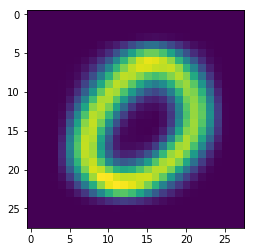

In [27]:
plt.imshow(TP_image.reshape((28,28)))
plt.show()

\begin{equation} \ True\ positive\ image.\ When,\ p = 2^{7} \end{equation}

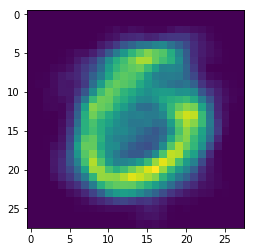

In [28]:
plt.imshow(FP_image.reshape((28,28)))
plt.show()

\begin{equation} \ False\ positive\ image.\ When,\ p = 2^{7} \end{equation}

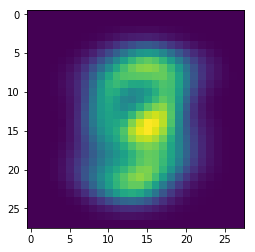

In [29]:
plt.imshow(TN_image.reshape((28,28)))
plt.show()

\begin{equation} \ True\ negative\ image.\ When,\ p = 2^{7} \end{equation}

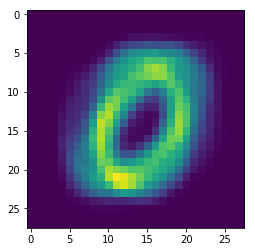

In [30]:
plt.imshow(FN_image.reshape((28,28)))
plt.show()

\begin{equation} \ False\ negative\ image.\ When,\ p = 2^{7} \end{equation}

In [31]:
print(F_score)

[841, 144, 8875, 139]


\begin{equation} Evaluation \ table \ [TP, FP, TN, FN].\ When, \ p = 2^{7} \end{equation}